In [94]:
# Importando modulos de Data Science 
import matplotlib.pyplot as plt 
import seaborn as sns 
import pandas as  pd 

### Carregamento de dados

In [95]:
df = pd.read_csv("dataset.csv",sep=";")

### Analise inicial de dados 
**Objetivos**:     
- Analisar brevemente os dados  
- Tipo de cada dos  
- Quantidade de valoresn nulos  
- Quantidad de duplicadas   

In [96]:
# Analisando as 5 primeiras instâncias do dataset
df.head()

,ID,Nome,Idade,Cidade,Produto,Preço,Quantidade,Data_Compra
0,1,Mariana,48.0,FORTALEZA,Tablet,"2010,87",7,30-05-2024
1,2,Bruno,42.0,RIO DE JANEIRO,Teclado,NaN,6,12-04-2025
2,3,Ana,54.0,RIO DE JANEIRO,Monitor,3619.29,2,10-12-2022
3,4,Carlos,62.0,CURITIBA,Teclado,40415.9,8,31-12-2022
4,5,Mariana,60.0,CURITIBA,Notebook,716.66,8,14-09-2023


In [97]:
# Informações gerais do dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 510 entries, 0 to 509
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ID           510 non-null    int64  
 1   Nome         510 non-null    object 
 2   Idade        489 non-null    float64
 3   Cidade       510 non-null    object 
 4   Produto      510 non-null    object 
 5   Preço        473 non-null    object 
 6   Quantidade   510 non-null    int64  
 7   Data_Compra  510 non-null    object 
dtypes: float64(1), int64(2), object(5)
memory usage: 32.0+ KB


In [98]:
# Identificando colunas com instâncias nulas 
df.isnull().sum()

ID              0
Nome            0
Idade          21
Cidade          0
Produto         0
Preço          37
Quantidade      0
Data_Compra     0
dtype: int64

In [99]:
# Observando valores unicos
df.nunique()

ID             500
Nome            10
Idade           53
Cidade          16
Produto          7
Preço          465
Quantidade      10
Data_Compra    394
dtype: int64

### Tratamento de dados

**Objetivos**       
- Remover valores ausentes  
- Determinar uso de valores centrais    
- Definir novos valores     
- Padronizar valor de Preço para formato internacional      
- Padronizar tipos de variaveis     
- Retirar instâncias duplicadas     


In [100]:
"""
                             Removendo valores nulos 
    Observando os dados , por possuimos poucas instâncias sera necessario utilizar
    medidas centrais das determinadas colunas , em caso de maiores quantidade de dados
    não teria problema em dropar essas instâncias com campos nulos . A medida central 
    utilizada sera a mediana por conta de ser mais consistente e sofre menos interferencia
    de outliers. 

    Antes de passar para a etapa de mudança de valores nulos , foi observado que a 
    coluna Preço é do tipo object , então antes de tudo vamos padronizar essa coluna
    e ja aproveitar para transformar no formato internacional , além de transformar a 
    coluna idade em inteiro 
"""

df["Preço"] = df["Preço"].str.replace(",", ".", regex=False)
df["Preço"] = df["Preço"].astype(float)


In [ ]:

df["Preço"].fillna(df["Preço"].median(), inplace=True)
df["Idade"].fillna(df["Idade"].median(), inplace=True)
df['Idade'] = df['Idade'].astype(int)

In [102]:
df.isnull().sum()

ID             0
Nome           0
Idade          0
Cidade         0
Produto        0
Preço          0
Quantidade     0
Data_Compra    0
dtype: int64

In [103]:
"""
                            Padronizado valores de Cidade
        Temos SP , São Paulo...etc . Para esse problema vamos definir siglas das cidades
        primeiro vamos ver todas as cidades e definir um dicionario com as siglas de cada cidade
"""
df['Cidade'].value_counts()

Cidade
PORTO ALEGRE      67
SALVADOR          64
MANAUS            59
BELO HORIZONTE    59
CURITIBA          57
FORTALEZA         56
RIO DE JANEIRO    54
SÃO PAULO         47
porto alegre      10
rio de janeiro     7
belo horizonte     7
curitiba           6
salvador           5
fortaleza          5
manaus             4
são paulo          3
Name: count, dtype: int64

In [104]:
df['Cidade'] = df['Cidade'].str.lower()

In [105]:
df['Cidade'].value_counts()

Cidade
porto alegre      77
salvador          69
belo horizonte    66
curitiba          63
manaus            63
rio de janeiro    61
fortaleza         61
são paulo         50
Name: count, dtype: int64

In [106]:
siglas = {
    "porto alegre" : "PA",
    "salvador" : "SA",
    "belo horizonte" : "BH",
    "curitiba" : "CR",
    "manaus" : "MA",
    "rio de janeiro" : "RJ",
    "fortaleza" : "FO",
    "são paulo" : "SP"
}

df["Cidade"] = df["Cidade"].replace(siglas)

In [107]:
df['Cidade'].value_counts()

Cidade
PA    77
SA    69
BH    66
CR    63
MA    63
RJ    61
FO    61
SP    50
Name: count, dtype: int64

In [108]:
"""
                            Retirando valores duplicados
"""

df.drop_duplicates(inplace=True)

In [110]:
"""
                        Padronizando coluna Data
"""
df['Data_Compra'] = pd.to_datetime(df['Data_Compra'], dayfirst=True, errors='coerce')

In [112]:
df["Dia"] = df['Data_Compra'].dt.day
df["Mês"] = df['Data_Compra'].dt.month
df["Ano"] = df['Data_Compra'].dt.year

In [ ]:
"""
                            Dropando colunas 
"""
columns_drop = ["ID","Nome","Data_Compra"]
df.drop(columns=columns_drop,inplace=True)

### Analise exploratoria dos dados

**Objetivos**
- Plotagem de graficos

In [117]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 501 entries, 0 to 508
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Idade       501 non-null    int64  
 1   Cidade      501 non-null    object 
 2   Produto     501 non-null    object 
 3   Preço       501 non-null    float64
 4   Quantidade  501 non-null    int64  
 5   Dia         501 non-null    int32  
 6   Mês         501 non-null    int32  
 7   Ano         501 non-null    int32  
dtypes: float64(1), int32(3), int64(2), object(2)
memory usage: 29.4+ KB


In [118]:
numeric = ['Idade','Preço','Quantidade','Dia','Mês','Ano']
obj = ["Cidade","Produto"]

In [119]:
df[numeric].describe()

,Idade,Preço,Quantidade,Dia,Mês,Ano
count,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,44.301397,3098.617305,5.752495,15.558882,6.321357,2023.842315
std,15.042838,3657.099579,2.863323,8.680036,3.403311,0.817977
min,18.000000,509.890000,1.000000,1.000000,1.000000,2022.000000
25%,32.000000,1772.050000,3.000000,8.000000,3.000000,2023.000000
50%,44.000000,2835.950000,6.000000,15.000000,6.000000,2024.000000
75%,57.000000,3710.160000,8.000000,23.000000,9.000000,2024.000000
max,70.000000,47611.600000,10.000000,31.000000,12.000000,2025.000000


In [121]:
df[obj].describe()

,Cidade,Produto
count,501,501
unique,8,7
top,PA,Smartphone
freq,76,82


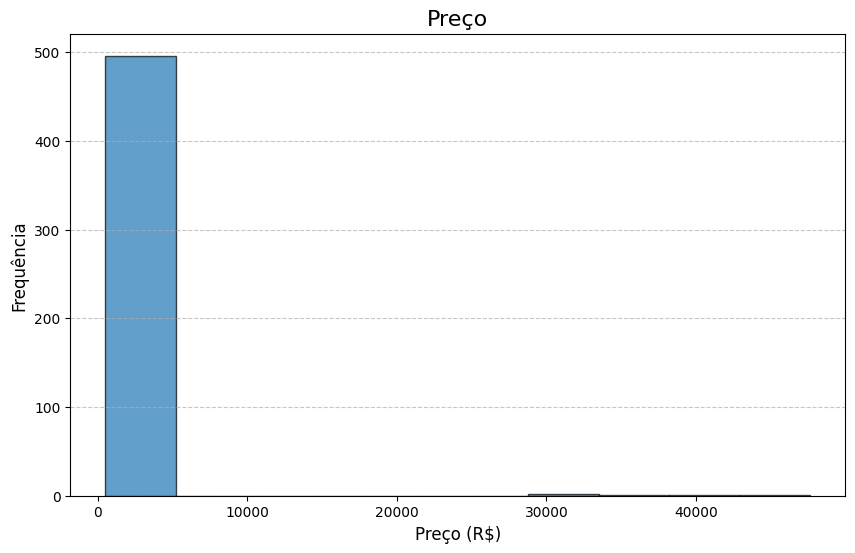

In [ ]:
df['Preço'].plot.hist(edgecolor='black', alpha=0.7, figsize=(10, 6))
plt.title('Preço', fontsize=16)
plt.xlabel('Preço (R$)', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

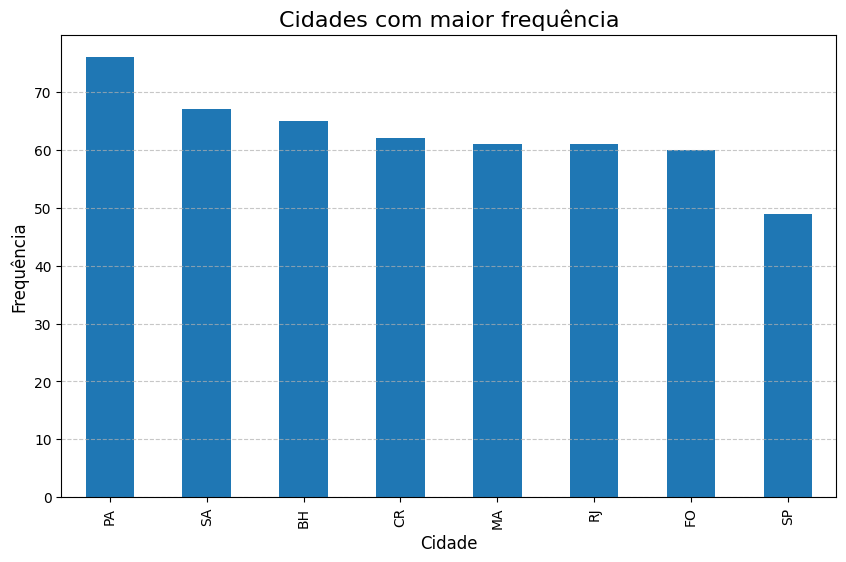

In [139]:
df['Cidade'].value_counts().plot.bar(figsize=(10, 6))
plt.title('Cidades com maior frequência', fontsize=16)
plt.xlabel('Cidade', fontsize=12)
plt.ylabel('Frequência', fontsize=12)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [140]:
df.to_csv("dataset_tratado.csv")